In [ ]:
import matplotlib.pyplot as plt
from autograd import grad, numpy as np
import itertools
import pandas as pd
from google.colab import files
import csv
import io
from calendar import monthrange
import numpy as np

!pip install lmfit

     |████████████████████████████████| 266kB 5.3MB/s 
     |████████████████████████████████| 61kB 5.2MB/s 
     |████████████████████████████████| 256kB 12.0MB/s 
  Created wheel for lmfit: filename=lmfit-1.0.1-cp36-none-any.whl size=81989 sha256=f1a77e5862af5d27ac5a3f392892eeb118ff2e20d9617e9a4f0eed8709c499bf
  Stored in directory: /root/.cache/pip/wheels/ef/22/8d/6cd9c0af36f501cfb248673b05dad5d2c27504951d55519acb
  Created wheel for asteval: filename=asteval-0.9.21-cp36-none-any.whl size=17286 sha256=85255665bfe92941191719d8396b564129834759e324162828d35db80b16f8c6
  Stored in directory: /root/.cache/pip/wheels/53/9d/3b/da1ff15feb7d97bb195837f4e78f971c748a945bd4720003ce
Successfully built lmfit asteval


In [130]:
!git init https://github.com/FMS-Mu2e/CalibMagnetCalc/tree/main/Modeling
!git config — global user.email “darrending2022@u.northwestern.edu”
!git config — global user.name “darrending8319”

Reinitialized existing Git repository in /content/https:/github.com/FMS-Mu2e/CalibMagnetCalc/tree/main/Modeling/.git/
usage: git config [<options>]

Config file location
    --global              use global config file
    --system              use system config file
    --local               use repository config file
    -f, --file <file>     use given config file
    --blob <blob-id>      read config from given blob object

Action
    --get                 get value: name [value-regex]
    --get-all             get all values: key [value-regex]
    --get-regexp          get values for regexp: name-regex [value-regex]
    --get-urlmatch        get value specific for the URL: section[.var] URL
    --replace-all         replace all matching variables: name value [value_regex]
    --add                 add a new variable: name value
    --unset               remove a variable: name [value-regex]
    --unset-all           remove all matches: name [value-regex]
    --rename-section      r

In [ ]:
!git add -A
!git commit -m “first commit”

In [127]:
!git remote rm origin

In [128]:
!git push -u origin /FMS-Mu2e/CalibMagnetCalc/tree/main/Modeling

fatal: remote part of refspec is not a valid name in /FMS-Mu2e/CalibMagnetCalc/tree/main/Modeling


In [ ]:
uploaded = files.upload()

Saving gap70_B_vs_I_r0z0_0-300_results.csv to gap70_B_vs_I_r0z0_0-300_results.csv


In [ ]:
uploaded = files.upload()

Saving gap75_B_vs_I_r0z0_0-300_results.csv to gap75_B_vs_I_r0z0_0-300_results.csv


In [ ]:
#@title df (gap70)
# |B| @ r=z=0 (center of gap)
# Gap: 70mm
# Current Range: [0, 300] Amps 
# Current step size: 0.1 Amps
# N_steps: 3001
# Data is comma delimited
# Columns: I [A]:  B [T]

with open("gap70_B_vs_I_r0z0_0-300_results.csv", 'r') as csvfile:
  data = np.array(list(csv.reader(csvfile, delimiter=",")))

df = pd.DataFrame(data, columns = ['I', 'B'])
df = df.drop(0)
df = df.astype({'I':float, 'B':float})
df

,I,B
1,0.0,0.000000
2,0.1,0.001259
3,0.2,0.002517
4,0.3,0.003776
5,0.4,0.005035
...,...,...
2997,299.6,1.767591
2998,299.7,1.767788
2999,299.8,1.767985
3000,299.9,1.768182


In [ ]:
#@title df2 (gap75)
#GMW Magnet with varying current,  |B| @ r=z=0 (center of gap)
#Gap: 75mm
#Current Range: [0, 300] Amps 
#Current step size: 0.1 Amps
#N_steps: 3001
#Data is comma delimited

with open("gap75_B_vs_I_r0z0_0-300_results.csv", 'r') as csvfile:
  data2 = np.array(list(csv.reader(csvfile, delimiter=",")))

df2 = pd.DataFrame(data2, columns = ['I', 'B'])
df2 = df2.drop(0)
df2 = df2.astype({'I':float, 'B':float})
df2

,I,B
1,0.0,0.000000
2,0.1,0.001176
3,0.2,0.002352
4,0.3,0.003528
5,0.4,0.004704
...,...,...
2997,299.6,1.727498
2998,299.7,1.727696
2999,299.8,1.727895
3000,299.9,1.728093


Text(0.5, 0, 'I (Amps)')

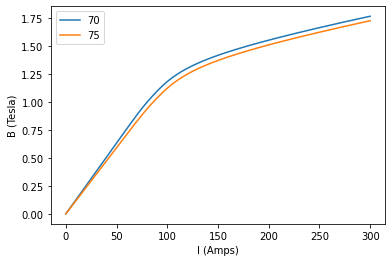

In [ ]:
#@title Plot Functions
#plot two functions
fig = plt.figure
_ = plt.plot(df['I'].values, df['B'].values, label="70")
_ = plt.plot(df2['I'].values, df2['B'].values, label="75")
plt.legend()
plt.ylabel("B (Tesla)")
plt.xlabel("I (Amps)")

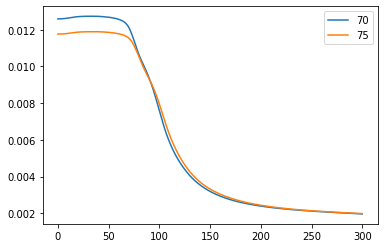

In [ ]:
#@title Plot Derivatives
#plot derivatives
outputs = []
for i in range(1, len(df['I'].values), 1):
  outputs.append((df['B'].values[i] - df['B'].values[i-1]) / (df['I'].values[i] - df['I'].values[i-1]))

outputs2 = []
for i in range(1, len(df2['I'].values), 1):
  outputs2.append((df2['B'].values[i] - df2['B'].values[i-1]) / (df2['I'].values[i] - df2['I'].values[i-1]))

plt.plot(df['I'].values[1:], outputs, label="70")
plt.plot(df2['I'].values[1:], outputs2, label="75")
plt.legend()

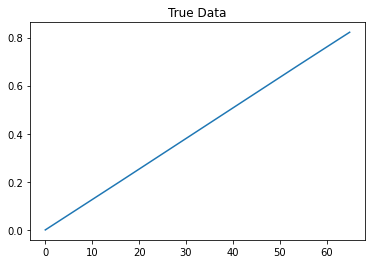

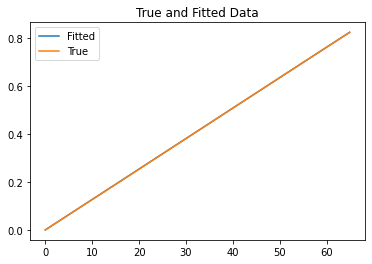

In [ ]:
fig = plt.figure()
dflinear = df[df['I']<65]
plt.plot(dflinear['I'], dflinear['B'])
plt.title('True Data')

def linear(current, **params):
  return (params['alpha']*current) + params['beta']

import lmfit as lm
model = lm.Model(linear, independent_vars=['current'])
params = lm.Parameters()
params.add('alpha', value=1, vary=True)
params.add('beta', value=0, vary=False)
samples = dflinear['B'].values
result1 = model.fit(samples, current = dflinear['I'].values, params=params)

fig = plt.figure()
plt.plot(dflinear['I'].values, result1.params['alpha'].value * dflinear['I'].values + result1.params['beta'].value, label = "Fitted")
plt.plot(dflinear['I'], dflinear['B'], label="True")
plt.legend()
plt.title('True and Fitted Data')

result1

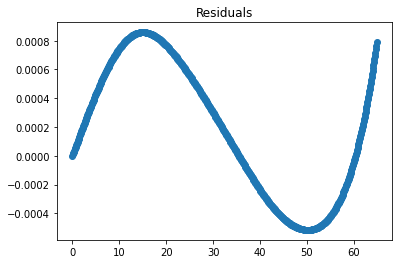

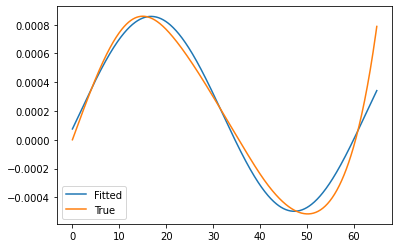

In [ ]:
#get this below 10**-4 at the very least
fig = plt.figure()
fittedlinear1 = (result1.params['alpha'].value * dflinear['I'].values + result1.params['beta'].value)
residual1 = (fittedlinear1 - dflinear['B'])
plt.scatter(dflinear['I'], residual0)
plt.title('Residuals')

def cos(current, **params):
  return (params['a'] * np.cos(params['b']*(current - params['c']))) + params['d']

model = lm.Model(cos, independent_vars=['current'])
params = lm.Parameters()
params.add('a', value=0.0001, vary=True)
params.add('b', value=0.1, vary=True)
params.add('c', value=0, vary=True)
params.add('d', value=1, vary=True)

samples = residual0
result11 = model.fit(samples, current = dflinear['I'].values, params=params)

fitted11 = (result11.params['a'] * np.cos(result11.params['b'].value * (dflinear['I'].values - result11.params['c'].value))) + result11.params['d'].value
fig = plt.figure()
plt.plot(dflinear['I'].values, fitted11, label = "Fitted")
plt.plot(dflinear['I'], residual0, label="True")
plt.legend()
result11

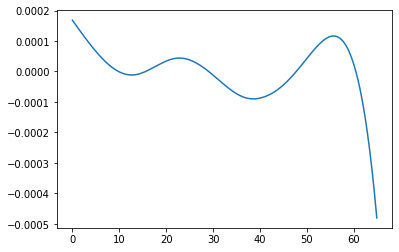

In [ ]:
plt.plot(dflinear['I'].values, fitted00 - residual0)

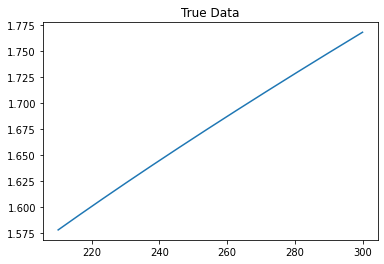

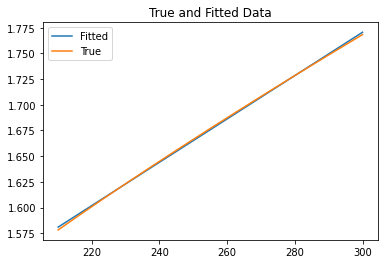

In [ ]:
fig = plt.figure()
dflinear2 = df[df['I']>210]
plt.plot(dflinear2['I'], dflinear2['B'])
plt.title('True Data')

model = lm.Model(linear, independent_vars=['current'])
params = lm.Parameters()
params.add('alpha', value=1, vary=True)
params.add('beta', value=1, vary=True)
samples = dflinear2['B'].values
result2 = model.fit(samples, current = dflinear2['I'].values, params=params)

fig = plt.figure()
fittedlinear200 = (result2.params['alpha'].value * dflinear2['I'].values + result2.params['beta'].value)
plt.plot(dflinear2['I'].values, fittedlinear200, label = "Fitted")
plt.plot(dflinear2['I'], dflinear2['B'], label="True")
plt.title('True and Fitted Data')
plt.legend()
result2

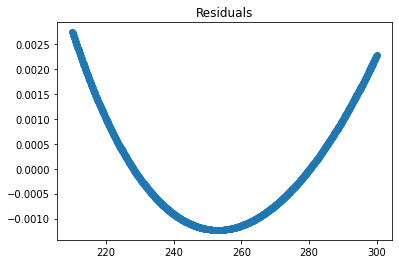

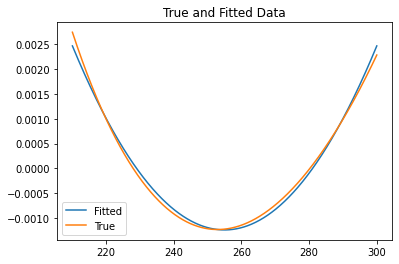

In [ ]:
fig = plt.figure()
residuals2 = fittedlinear200 - dflinear2['B']
plt.scatter(dflinear2['I'], residuals2)
plt.title('Residuals')

def power(current, **params):
  return (params['a']*((current - params['b'])**params['c'])) + params['d']

model = lm.Model(power, independent_vars=['current'])
params = lm.Parameters()
params.add('a', value=1, vary=True)
params.add('b', value=-1, vary=True)
params.add('c', value=2, vary=False)
params.add('d', value=-1, vary=True)

samples = residuals2
result22 = model.fit(samples, current = dflinear2['I'].values, params=params)

fig = plt.figure()
fittedpower2 = (result22.params['a']*((dflinear2['I'].values - result22.params['b'])**result22.params['c'])) + result22.params['d']
plt.plot(dflinear2['I'].values, fittedpower2, label = "Fitted")
plt.plot(dflinear2['I'], residuals2, label="True")
plt.title('True and Fitted Data')
plt.legend()

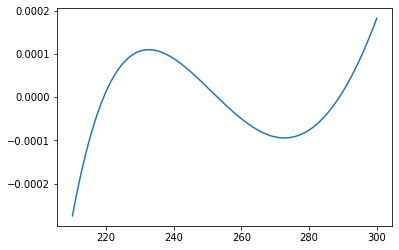

In [ ]:
plt.plot(dflinear2['I'].values, fittedpower2 - residuals2, label = "Fitted")

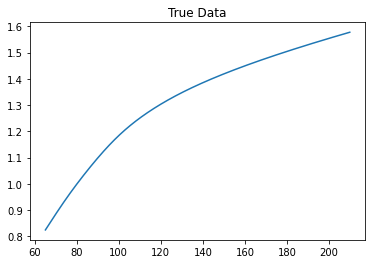

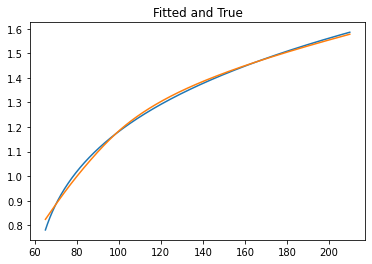

In [ ]:
fig = plt.figure()
dfnonlinear = df[(df['I']>65) & (df['I']<210)]
plt.plot(dfnonlinear['I'], dfnonlinear['B'])
plt.title('True Data')

def fwdfn(current, **params):
  return params['beta']*((current - params['gamma'])**params['alpha'])

model = lm.Model(fwdfn, independent_vars=['current'])
params = lm.Parameters()
params.add('alpha', value=1, vary=True)
params.add('beta', value=1, vary=True)
params.add('gamma', value=50, vary=True)
params.add('c', value=0, vary=True)
samples = dfnonlinear['B'].values
result3 = model.fit(samples, current = dfnonlinear['I'].values, params=params)

fig = plt.figure()
fittednonlinear = result3.params['beta']*((dfnonlinear['I'].values - result3.params['gamma'])**result3.params['alpha']) + result3.params['c'].value
plt.plot(dfnonlinear['I'].values, fittednonlinear)
plt.plot(dfnonlinear['I'].values, dfnonlinear['B'].values)
plt.title('Fitted and True')

result3

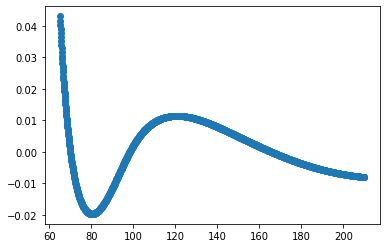

In [ ]:
plt.scatter(dfnonlinear['I'].values, dfnonlinear['B'].values - fittednonlinear)